In [28]:
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
data = pd.read_csv('seeds-less-rows.csv')
data.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [40]:
# remove the grain species from the data frame
X = data.iloc[:, 0:7]
Y = data.iloc[: , -1] # assign grain species to Target matrix

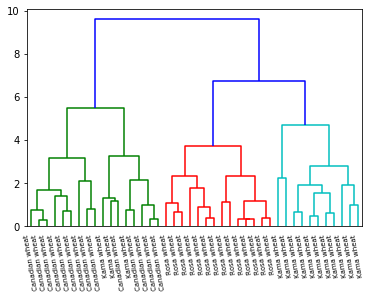

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram ,fcluster

mergings = linkage(X,method='complete')
dendrogram(mergings,labels=Y.values,leaf_font_size=7,leaf_rotation=100)
plt.show()

In [43]:
# obtain a flat clustering by using fcluster() on mergings, assign the result to label
labels = fcluster(mergings,6,criterion='distance')

In [51]:
# Create a data frame with two columns labels and varieties 
df = pd.DataFrame({'labels':labels,  'varieties': Y})
df[:5]

,labels,varieties
0,3,Kama wheat
1,3,Kama wheat
2,3,Kama wheat
3,3,Kama wheat
4,3,Kama wheat


In [45]:
# create a cross table (ct) b/w df['labels'] and df['varieties']
#to count the number of times each grain variety concides with each cluster label.

ct = pd.crosstab(df['labels'],df['varieties'])

In [46]:
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,14,3,0
2,0,0,14
3,0,11,0


In [ ]:
#Conclusion: Three varieties of labels extracted from 'seeds-less-rows’ dataset by applying Hierarchical 
#clustering technique as shown in the output table ct.